In [2]:
%matplotlib inline

import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram

### Functions for loading sound files, plotting waves and spectrograms 

In [21]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(np.array(X))
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [4]:
sound_file_paths = ["BD15C/5801100W.wav","BD6A/61072013.wav","BD6B/5903700S.wav","BD15C/7500300H.wav"]

sound_names = ["BD15C", "BD6A", "BD6B", "BD15C"]

raw_sounds = load_sound_files(sound_file_paths)

# plot_waves(sound_names,raw_sounds)
# plot_specgram(sound_names,raw_sounds)
# plot_log_power_specgram(sound_names,raw_sounds)

In [14]:
files = os.listdir(sound_names[0])
files = [sound_names[0] + "/" + s for s in files]

In [22]:
raw_files = load_sound_files(files)

In [34]:
raw_files[0]

array([  1.67593185e-04,  -8.92362441e-05,  -4.64580161e-03, ...,
         4.89805788e-02,   4.79734875e-02,   0.00000000e+00], dtype=float32)

In [32]:
raw_files[0].shape

(31977,)

In [58]:
sample, sr = librosa.load(files[1])
mfccs = librosa.feature.mfcc(y=sample, sr=sr, n_mfcc=40)
mel = librosa.feature.melspectrogram(sample, sr=sr).T

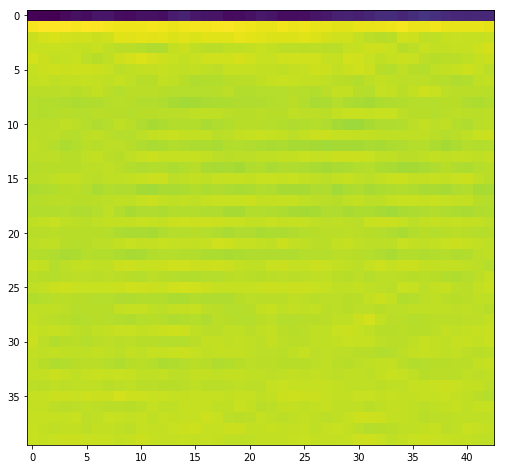

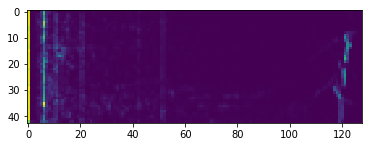

In [59]:
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mfccs))
plt.show(plt.imshow(mel))


In [8]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print "Error encountered while parsing file: ", fn
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [9]:
sound_file_paths = ["BD15C/5801100W.wav","BD6A/61072013.wav","BD6B/5903700S.wav","BD15C/7500300H.wav"]

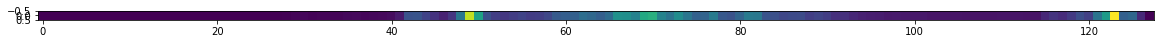

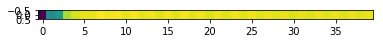

In [10]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[0])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

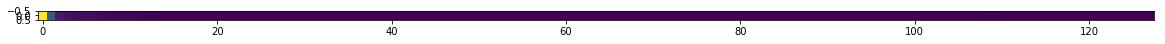

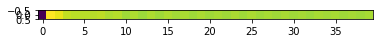

In [65]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[1])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

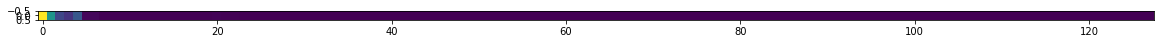

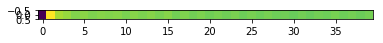

In [66]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[2])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

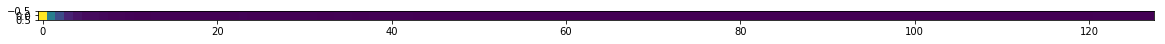

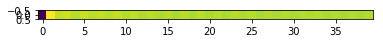

In [67]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[3])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))